In [53]:
from sklearn.cluster import AgglomerativeClustering 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
# load dataset select 'data' sheet 
airLine = pd.read_excel('EastWestAirlines.xlsx',
                        sheet_name='data')
airLine.rename(columns={'ID#':'ID',
                        'Award?':'Award'},inplace=True)

In [54]:
airLine.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [56]:
# dataset contains 3999 rows and 
# 12 columns
airLine.shape

(3999, 12)

In [57]:
# Award is categorical data in numerical form 
airLine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [58]:
# no null values present 
airLine.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [59]:
# features 
# 'ID' not a feature
data = airLine.iloc[:,1:-1]
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [60]:
# class (award)
target = airLine[['Award']].astype('int64')

In [61]:
# data preprocessing by standardization 
scaler = StandardScaler()
transData = scaler.fit_transform(data)
transData = pd.DataFrame(transData,columns=data.columns)
transData.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


## Hierarchical Clustering

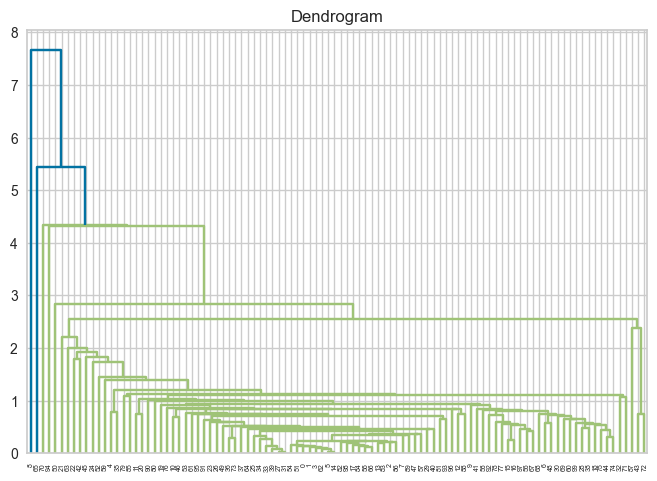

In [62]:
# tree arrangement of clusters of first 100 observations 

dendrogram = sch.dendrogram(sch.linkage(transData.iloc[:100],
                                        method='single'))
plt.title('Dendrogram')
plt.show()

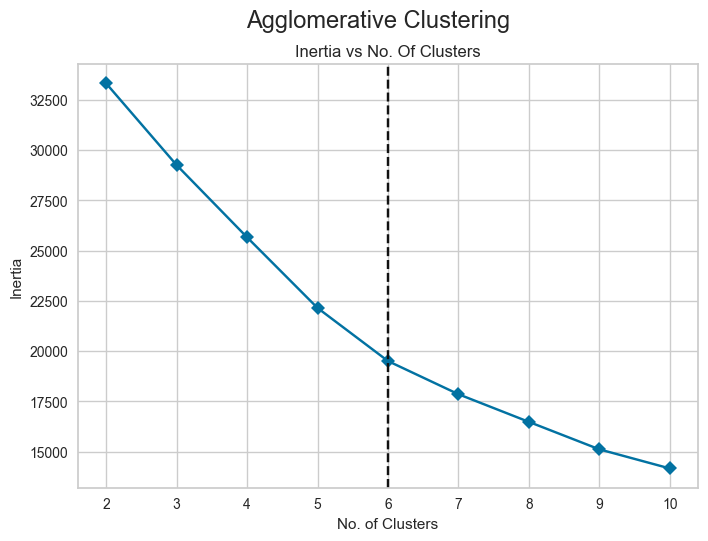

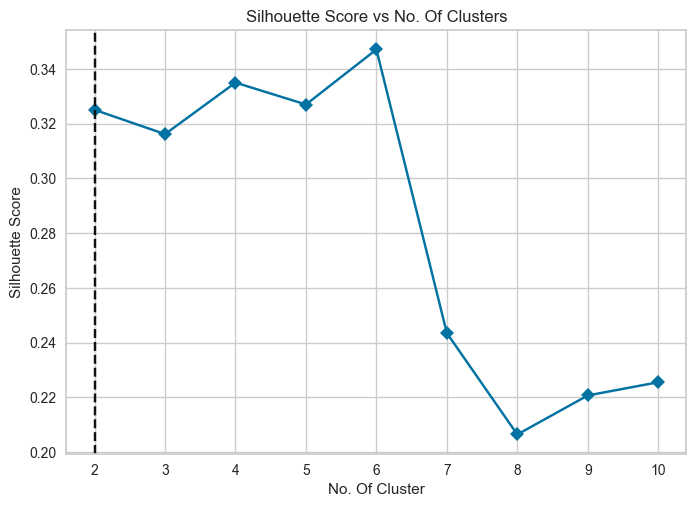

In [63]:

model = AgglomerativeClustering()
visInertia = KElbowVisualizer(model,k=(2,11),timings=False)
visInertia.fit(transData)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('Inertia vs No. Of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,11),
                       metric='silhouette',
                       timings=False)
plt.title('Silhouette Score vs No. Of Clusters')
plt.xlabel('No. Of Cluster')
plt.ylabel('Silhouette Score')
visSilh.fit(transData)
plt.show()

In [65]:
# final Agglomerative (hierarchical clustering) with 
# No. of clusters = 8

final_hc = AgglomerativeClustering(n_clusters=visInertia.elbow_value_,
                                   affinity='euclidean',
                                   linkage='single')
final_hc.fit(transData)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [64]:
paMatrix = pd.crosstab(final_hc.labels_,
                       target.values.ravel())

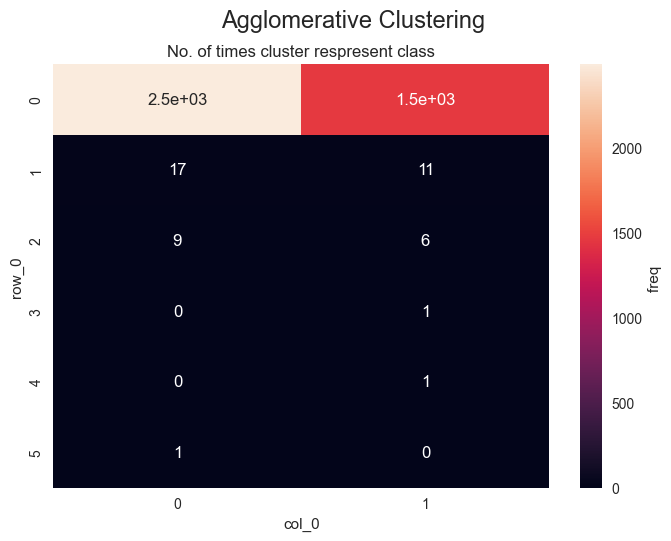

In [66]:

# presence abscense matrix
sns.heatmap(paMatrix,
            cbar_kws={'label':'freq '},
            annot=True)
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of times cluster respresent class')
plt.show()

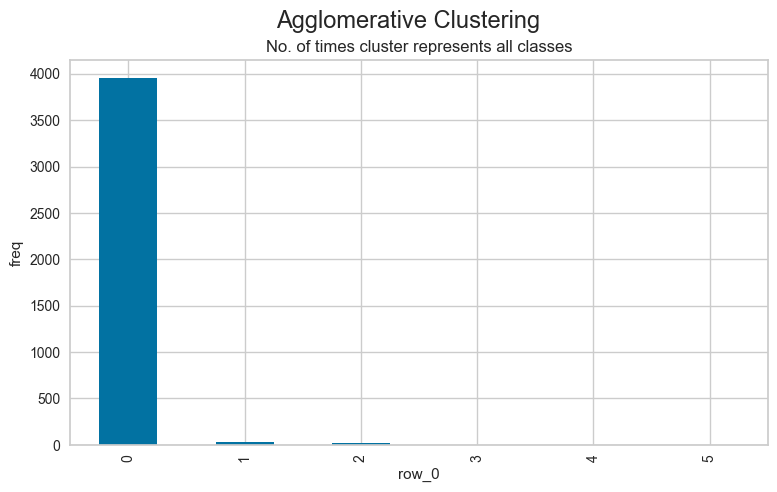

In [67]:

# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix.sum(axis=1).plot(kind='bar')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of times cluster represents all classes')
plt.ylabel('freq')
plt.show()

In [68]:
data['clusterID'] = final_hc.labels_
data.join(target)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterID
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0


In [69]:
score = silhouette_score(transData,final_hc.labels_)*100
score

57.0552166191495

### Agglomerative Clustering with 5 Clusters and silhouette Score of +57.06%

## KMeans Clustering

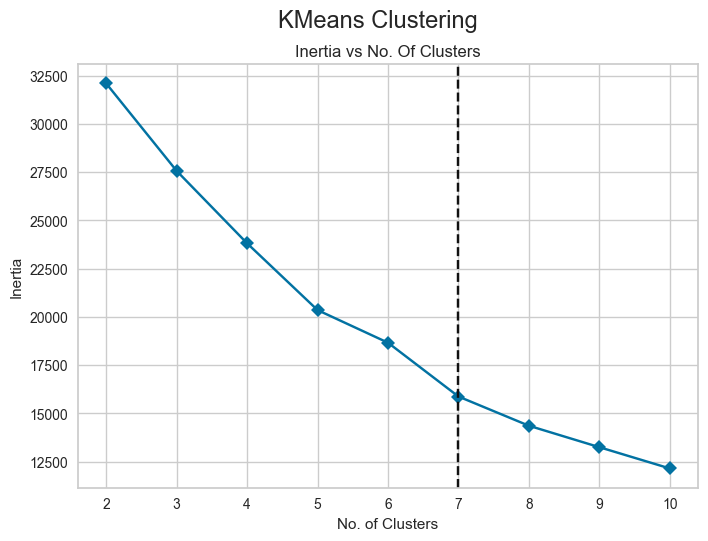

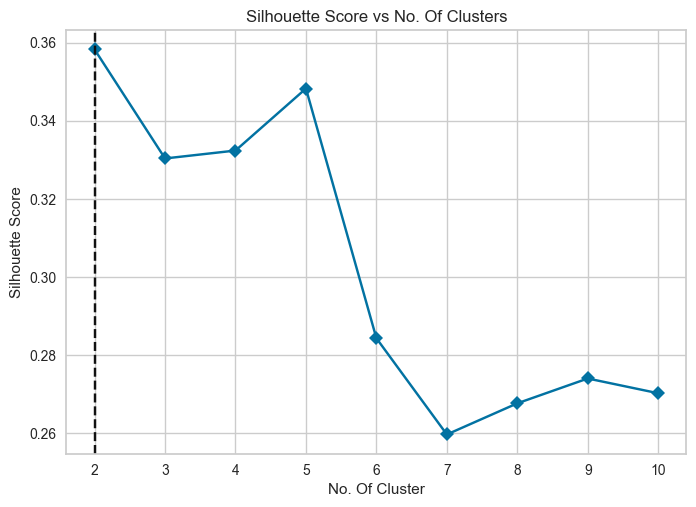

In [70]:

model = KMeans(random_state=42)
visInertia = KElbowVisualizer(model,k=(2,11),timings=False)
visInertia.fit(transData)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('Inertia vs No. Of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,11),
                       metric='silhouette',
                       timings=False)
plt.title('Silhouette Score vs No. Of Clusters')
plt.xlabel('No. Of Cluster')
plt.ylabel('Silhouette Score')
visSilh.fit(transData)
plt.show()

In [71]:
# final KMeans (non-hierarchical clustering) with 
# No. of clusters = 7

final_kmeans = KMeans(n_clusters=visInertia.elbow_value_,
                      random_state=42)
final_kmeans.fit(transData)

KMeans(n_clusters=7, random_state=42)

In [72]:
paMatrix_KMeans = pd.crosstab(final_kmeans.labels_,
                       target.values.ravel())

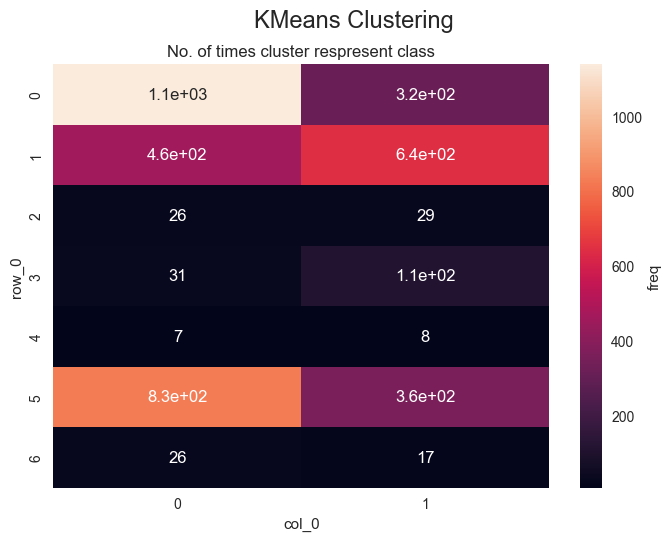

In [73]:

# presence/abscense matrix
sns.heatmap(paMatrix_KMeans,
            cbar_kws={'label':'freq'},
            annot=True)
plt.title('No. of times cluster respresent class')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.show()

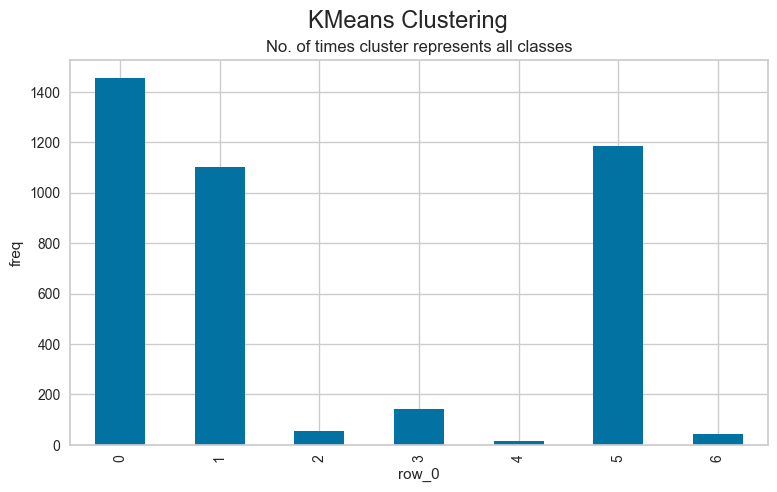

In [74]:

# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix_KMeans.sum(axis=1).plot(kind='bar')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('No. of times cluster represents all classes')
plt.ylabel('freq')
plt.show()

In [75]:
data['clusterID'] = final_kmeans.labels_
data.join(target)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterID
0,28143,0,1,1,1,174,1,0,0,7000,5
1,19244,0,1,1,1,215,2,0,0,6968,5
2,41354,0,1,1,1,4123,4,0,0,7034,5
3,14776,0,1,1,1,500,1,0,0,6952,5
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [76]:
score = silhouette_score(transData,
                         final_kmeans.labels_)*100
score

25.97253759856855

### KMeans Clustering with 7 Clusters and silhouette Score of +25.97 %

## DBSCAN Clustering

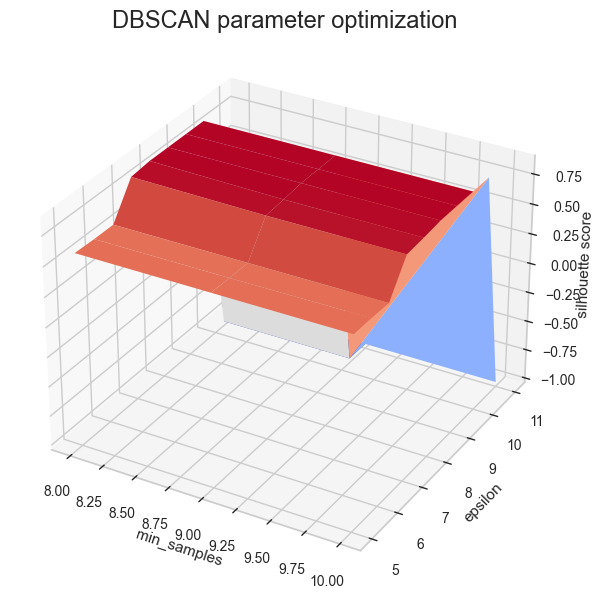

In [77]:
# brute-force-approach to find best combination
# (min_samples,epsilon) for DBSCAN clustering

eps = np.linspace(5,11,10)
min_samples = [8,9,10]
coor = []
for e in eps:
    score = []
    for m in min_samples:
        model = DBSCAN(eps=e,
                       min_samples=m)
        model.fit(transData)
        try:
            s = silhouette_score(transData,model.labels_)
            score.append(s)
        except :
            score.append(-1)
    coor.append(score)
coor = np.array(coor)  

new = pd.DataFrame(coor,columns=min_samples)
new['eps'] = eps

X , Y = np.meshgrid(new.columns[:-1],new.eps.values.ravel())
X = X.astype('float')
Z = new.values[:,:-1]
fig = plt.figure(label='DBSCAN parameter optimization')
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)
ax.set_xlabel('min_samples')
ax.set_ylabel('epsilon')
ax.set_zlabel('silhouette score')
ax.set_title('DBSCAN parameter optimization',fontsize=17)
plt.show()


In [78]:
param = []
for ep,ms in np.argwhere(Z == Z.max()):
    param.append([new.columns[ms],new.eps[ep]])
# DBSCAN parameter giving maximum silhouette score
pd.DataFrame(param,columns=['min_samples','epsilon'])

,min_samples,epsilon
0,8,7.666667
1,8,8.333333
2,9,8.333333
3,10,8.333333
4,8,9.000000
5,9,9.000000
6,10,9.000000
7,8,9.666667
8,9,9.666667
9,10,9.666667


In [79]:
# final DBSCAN (non-hierarchical clustering) with 
# epsilon = 7.67 and min_samples = 8

final_dbscan = DBSCAN(eps=7.67,min_samples=8)
final_dbscan.fit(transData)

DBSCAN(eps=7.67, min_samples=8)

In [80]:
paMatrix_DBSCAN = pd.crosstab(final_dbscan.labels_.astype('int'),
                       target.values.ravel())

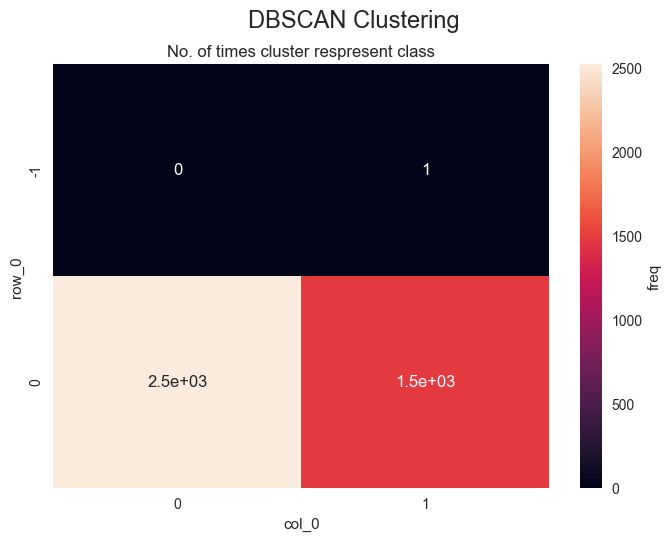

In [81]:
# presence/abscense matrix
sns.heatmap(paMatrix_DBSCAN,
            cbar_kws={'label':'freq'},
            annot=True)
plt.title('No. of times cluster respresent class')
plt.suptitle('DBSCAN Clustering',fontsize=17)
plt.show()

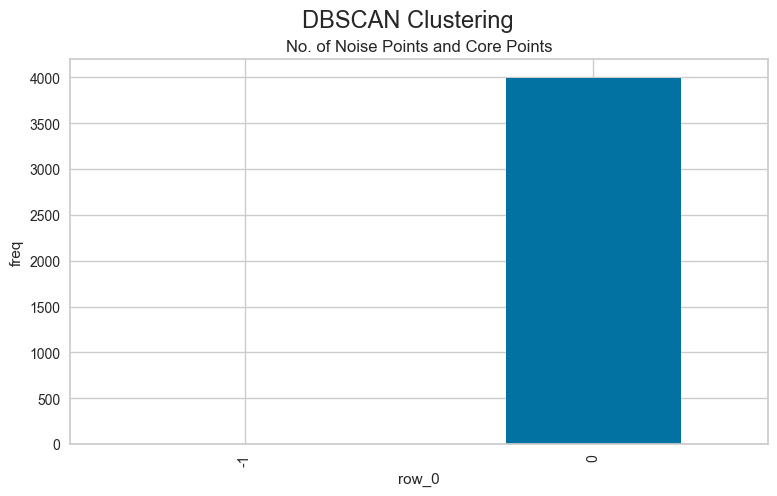

In [82]:
# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix_DBSCAN.sum(axis=1).plot(kind='bar')
plt.suptitle('DBSCAN Clustering',fontsize=17)
plt.title('No. of Noise Points and Core Points')
plt.ylabel('freq')
plt.show()

In [83]:
data['clusterID'] = final_dbscan.labels_
data.join(target)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterID
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0


In [84]:
score = silhouette_score(transData,
                         final_dbscan.labels_)*100
score

86.7447784990924

### DBSCAN Clustering with Silhouette Score of +86.74%